In [2]:
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

Linear Method:
[1157.46464329 1210.13420263 1113.8879611  1005.55241626  908.85053485
  826.42287338  756.64532486  697.30826472  646.44330998  602.45550569]
Trapezoidal Method:
[1156.28817706 1208.79648168 1112.51022425 1004.15780294  907.44570195
  825.01051832  755.22688706  695.88467569  645.01524853  601.02350167]
Simpson's Rule:
[1157.14059964 1209.47120427 1113.01494251 1004.54624982  907.75454845
  825.26292521  755.4378202   696.06416746  645.1702677   601.15904386]
Gaussian Quadrature:
[1157.14059964 1209.47120427 1113.01494251 1004.54624982  907.75454845
  825.26292522  755.4378202   696.06416747  645.17026772  601.15904388]
Trapz Method:
[1175.97137569 1236.51179986 1137.85929405 1026.07667131  926.40304603
  841.58995355  769.90704213  709.03115401  656.90502333  611.8683558 ]


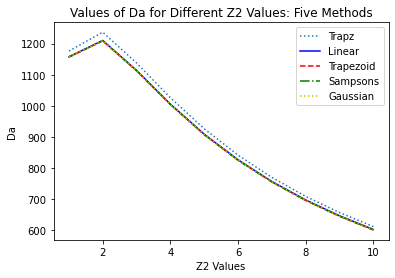

In [5]:
import matplotlib.pyplot as plt
import math
import numpy as np






def r(x):
    return 3e3/math.sqrt(0.3*(1+x)**3 +0.7)

N=1000
a=0


#Linear Method

DaL = np.empty(10,float)
for j in range(0,10):
    b=j+1
    h=(b-a)/N
    integral=0

    for i in range(0,N):
        integral += r(a + i*h)

    Db=integral*h/(1+b)
    DaL[j]=Db
    #print(Db)

print("Linear Method:")
print(DaL)


#Trapezoid Method

DaT =np.empty(10,float)


for j in range(0,10):
    b=j+1
    h=(b-a)/N
    integralT=0
    for i in range(1,N-1):
        integralT+= r(a+i*h)
        
    integralT += 0.5*r(a) + 0.5*r(b)
    Db=integralT*h/(1+b)
    DaT[j]=Db
    #print(Db)

print("Trapezoidal Method:")
print(DaT)

#Simpson's Rule


DaS = np.empty(10,float)
for j in range(0,10):
    b=j+1
    h=(b-a)/N
    integralS= r(a)+r(b)
    for i in range(1,N,2):
        integralS += 4*r(a+i*h)

    for i in range(2,N,2):
        integralS += 2*r(a+i*h)

    Da=integralS*h/(3*(1+b))
    DaS[j]= Da
    #print(Da)
print("Simpson's Rule:")
print(DaS)


#Gaussian Quadrature]
DaG = np.empty(10, float)

for j in range(0,10):
    b= j+1
    x,w = gaussxw(N)
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    integralG=0
    for i in range(N):
        integralG+=wp[i]*r(xp[i])
        
    Da=integralG/(1+b)
    #print(Da)
    DaG[j]=Da

print("Gaussian Quadrature:")
print(DaG)


#Generic Trapz Method
DaM=np.empty(10, float)
y=[r(a)]

for j in range(0,10):
    integral=0
    b=j+1
    y.append(r(b))
    integral = np.trapz(y)
   #print(y)
   #print(integral)
    Da=integral/(1+b)
    DaM[j]=Da

#print(y)
print("Trapz Method:")
print(DaM)




###Plotting Time

xaxis=[1,2,3,4,5,6,7,8,9,10]

fig= plt.figure()
ax = fig.add_subplot(111)
plt.plot(xaxis,DaM, ':', label='Trapz')
plt.plot(xaxis, DaL, '-b', label='Linear')
plt.plot(xaxis, DaT, '--r', label='Trapezoid')
plt.plot(xaxis, DaS, '-.g', label='Sampsons')
plt.plot(xaxis, DaG, ':y', label='Gaussian')
plt.xlabel('Z2 Values')
plt.ylabel('Da')
plt.legend()
plt.title('Values of Da for Different Z2 Values: Five Methods')
plt.show()
